# Automobile Data Set
This machine learning task will be covering the following steps.

**1. Data Preprocessing**

**2. Missing Value Imputation**

**3. Model Building**

#1. Data Preprocessing

### Importing libraries and data

I have used Google Colab for this machine learning task.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing data and adding headers

In [3]:
#adding header as indicated in the data description
col_names=['symboling','normalized_losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
          'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cyclinders',
          'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
          'highway-mpg','price']

#import data
data =  pd.read_csv('/content/drive/MyDrive/imports-85.data', sep=",", header=None, names=col_names)
data

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


###Data Handling



The data description says there are some '?' symbols in the data set, which indicates there are some missing values in it.

Before we jump into this dataset deeply, let's look at general information regarding the dataset.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

First of all, It looks like there is no null values in the dataset;however, it is understandable as '?' symbol will not be counted as null.

Therefore, I will need to replace '?' symbols to nan and count the number of nan afterwards.

In [5]:
#Replacing '?' symbols to nan and counting the number of nan afterwards
data = data.replace('?', np.nan)
data.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cyclinders     0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since it is required in the task, I will drop data samples with missing values in the target as below (the number of missing values in the target is 41). So we have 164 rows. (205 - 41). And I will be dropping 'symboling' column as required in the task description.

In [6]:
#skipping data sample with missing values in the target
data = data[data.normalized_losses.notna()]
#drop column "symboling"
del data["symboling"]

In [7]:
#After convering '?' symbols to nan, we see some differences in null count as below.  
#column number 1,5,18,19,21,22,25
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    object 
 1   make               164 non-null    object 
 2   fuel-type          164 non-null    object 
 3   aspiration         164 non-null    object 
 4   num-of-doors       163 non-null    object 
 5   body-style         164 non-null    object 
 6   drive-wheels       164 non-null    object 
 7   engine-location    164 non-null    object 
 8   wheel-base         164 non-null    float64
 9   length             164 non-null    float64
 10  width              164 non-null    float64
 11  height             164 non-null    float64
 12  curb-weight        164 non-null    int64  
 13  engine-type        164 non-null    object 
 14  num-of-cyclinders  164 non-null    object 
 15  engine-size        164 non-null    int64  
 16  fuel-system        164 non

Now, we can see that there are missing values in the dataset. 
And also, it shows some data types of the variables are different from what I saw in the data description. 
(such as normalized-losses, price, horsepower and so on)
It seems to me that it is also because of '?' symbols in the columns mentioned above. Such variables should be the float type but their types are object. Therefore, we need to convert them manually.

In [8]:
# converting each mistyped columns to float
    
data["bore"] = data["bore"].astype(np.float64)
data["stroke"] = data["stroke"].astype(np.float64)
data["horsepower"] = data["horsepower"].astype(np.float64)
data["peak-rpm"] = data["peak-rpm"].astype(np.float64)
data["price"] = data["price"].astype(np.float64)
data["normalized_losses"] = data["normalized_losses"].astype(np.float64)

Now we can see that the columns have been successfully converted to float as below. (normalized-losses, bore, stroke, horsepower, peak-rpm  and price)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   make               164 non-null    object 
 2   fuel-type          164 non-null    object 
 3   aspiration         164 non-null    object 
 4   num-of-doors       163 non-null    object 
 5   body-style         164 non-null    object 
 6   drive-wheels       164 non-null    object 
 7   engine-location    164 non-null    object 
 8   wheel-base         164 non-null    float64
 9   length             164 non-null    float64
 10  width              164 non-null    float64
 11  height             164 non-null    float64
 12  curb-weight        164 non-null    int64  
 13  engine-type        164 non-null    object 
 14  num-of-cyclinders  164 non-null    object 
 15  engine-size        164 non-null    int64  
 16  fuel-system        164 non

And let's see if only categorical variables remained object

In [10]:
data.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cyclinders,fuel-system
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
6,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
8,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
10,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi


It seems like 'num-of-doors' and 'num of cyclinders' can be converted to int as they are numeric values (two, four ...).

In [11]:
data['num-of-doors'].unique()

array(['four', 'two', nan], dtype=object)

In [12]:
data['num-of-cyclinders'].unique()

array(['four', 'five', 'six', 'three', 'two', 'eight'], dtype=object)

In [13]:
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('two','2')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('three','3')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('four','4')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('five','5')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('six','6')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('eight','8')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('twelve','12')
data['num-of-cyclinders']=data['num-of-cyclinders'].astype('int64')

'num-of-cyclinders' has been converted to int but I will convert 'num-of-doors' after I impute missing values in it.

#2. Missing Value Imputation

###'num-of-doors'

Instead of imputing simply by mean, I would like to investigate in each variable first, so that I have a better idea as to how to impute them manually.

In [14]:
#nan for the column, 'num-of-doors'
data[data['num-of-doors'].isna()]

,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


Since the body-style of the car is sedan, I think I can impute num-of-doors as four, as seen from the graph below

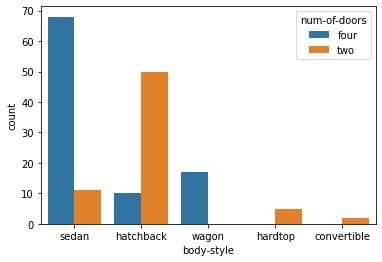

In [15]:
#plotting body-style vs num of doors
sns.countplot(data=data, x='body-style', hue='num-of-doors')
data['num-of-doors'].fillna('four', inplace = True)

data['num-of-doors']=data['num-of-doors'].str.replace('two','2')
data['num-of-doors']=data['num-of-doors'].str.replace('four','4')
data['num-of-doors']=data['num-of-doors'].astype('int64')

###Correlation plot

For other missing values that are supposed to be numeric,
I can use correlation plot which I can refer to when imputing.

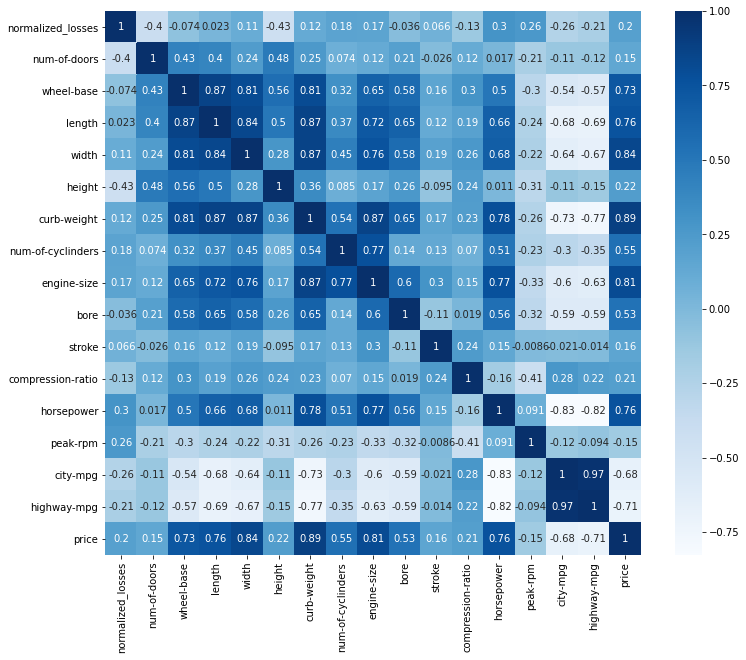

In [16]:
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show() 

###'bore'

In [17]:
#bore
data[data['bore'].isna()]

,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


Since bore is correlated to curb-weight and engine-size(top two), I will look into the correlations by making plots.

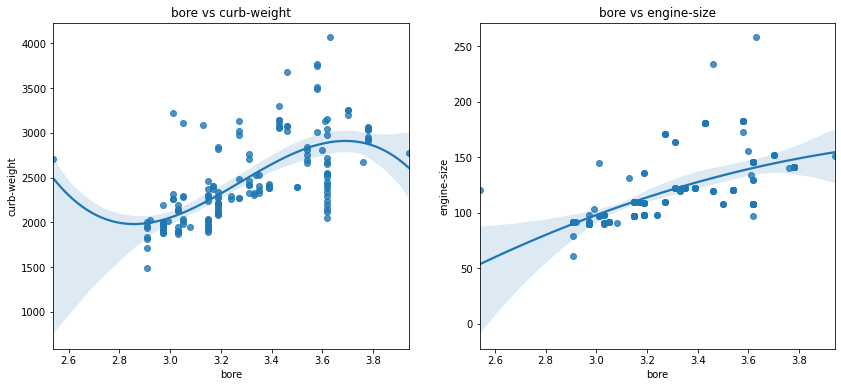

In [18]:
#plot the correlations
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='bore',y='curb-weight', order = 3)
plt.title('bore vs curb-weight')
plt.subplot(1,2,2)
sns.regplot(data=data, x='bore',y='engine-size', order = 2)
plt.title('bore vs engine-size');

It looks like the second graph shows a better correlation to interpret. As shown below, for engine-size around 70 and 80, bore is around 2.9

In [19]:
data[data['engine-size'].between(70,80)]['bore'].mean()

2.91

Therefore, I will imput missing values with 2.91

In [20]:
data['bore'].fillna(2.91, inplace = True)

###'stroke'

In [21]:
data[data['stroke'].isna()]

,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.91,NaN,9.4,101.0,6000.0,17,23,10945.0
56,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.91,NaN,9.4,101.0,6000.0,17,23,11845.0
57,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,2.91,NaN,9.4,101.0,6000.0,17,23,13645.0
58,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,2.91,NaN,9.4,135.0,6000.0,16,23,15645.0


Since stroke is correlated to compression-ratio and engine-size, (top two), I will look into the correlations.

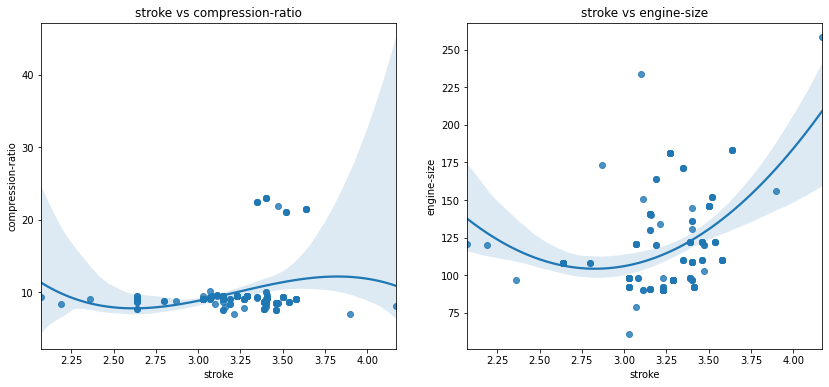

In [22]:
#plot the correlations
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='stroke',y='compression-ratio', order = 3)
plt.title('stroke vs compression-ratio')
plt.subplot(1,2,2)
sns.regplot(data=data, x='stroke',y='engine-size', order = 2)
plt.title('stroke vs engine-size');

It looks like the second graph shows a better correlation to interpret. As shown below, it looks like stroke is around 3.0 for engine-size around 70 and 80.

In [23]:
data[data['engine-size'].between(70,80)]['stroke'].mean()

3.07

Therefore, I will imput missing values with 3.07

In [24]:
data['stroke'].fillna(3.07, inplace = True)

Now we can see a clean dataset without any nans.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   make               164 non-null    object 
 2   fuel-type          164 non-null    object 
 3   aspiration         164 non-null    object 
 4   num-of-doors       164 non-null    int64  
 5   body-style         164 non-null    object 
 6   drive-wheels       164 non-null    object 
 7   engine-location    164 non-null    object 
 8   wheel-base         164 non-null    float64
 9   length             164 non-null    float64
 10  width              164 non-null    float64
 11  height             164 non-null    float64
 12  curb-weight        164 non-null    int64  
 13  engine-type        164 non-null    object 
 14  num-of-cyclinders  164 non-null    int64  
 15  engine-size        164 non-null    int64  
 16  fuel-system        164 non

Also, before I train a model, it is great to see there is no clear indication of outliers as below.

In [26]:
data.describe()

,normalized_losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cyclinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,122.000000,3.170732,98.164024,172.238415,65.598780,53.774390,2458.274390,4.182927,117.957317,3.288963,3.233232,10.126951,96.207317,5137.804878,26.268293,31.847561,11466.518293
std,35.442168,0.988335,5.120198,11.417833,1.923028,2.343942,475.087068,0.745178,30.896294,0.270801,0.291728,3.836306,30.408563,479.459113,6.193305,6.514349,5803.490319
min,65.000000,2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,94.000000,2.000000,94.500000,165.675000,64.000000,52.000000,2090.750000,4.000000,97.000000,3.050000,3.077500,8.700000,69.000000,4800.000000,22.000000,28.000000,7446.000000
50%,115.000000,4.000000,96.550000,172.000000,65.400000,54.100000,2367.500000,4.000000,109.000000,3.240000,3.270000,9.000000,91.000000,5200.000000,26.000000,32.000000,9268.500000
75%,150.000000,4.000000,100.400000,177.800000,66.500000,55.500000,2785.500000,4.000000,131.750000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,256.000000,4.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,8.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


#3. Building a model

###Dummy variables for the categorical features

In [27]:
# Encoding the categorical features
categorical_columns = ['make','fuel-type','aspiration', 'body-style', 'drive-wheels',
                       'engine-location', 'engine-type', 'fuel-system'] 
    
for column in categorical_columns:
  dummies = pd.get_dummies(data[column], prefix=column)
  data = pd.concat([data, dummies], axis=1)
  data = data.drop(column, axis=1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   normalized_losses       164 non-null    float64
 1   num-of-doors            164 non-null    int64  
 2   wheel-base              164 non-null    float64
 3   length                  164 non-null    float64
 4   width                   164 non-null    float64
 5   height                  164 non-null    float64
 6   curb-weight             164 non-null    int64  
 7   num-of-cyclinders       164 non-null    int64  
 8   engine-size             164 non-null    int64  
 9   bore                    164 non-null    float64
 10  stroke                  164 non-null    float64
 11  compression-ratio       164 non-null    float64
 12  horsepower              164 non-null    float64
 13  peak-rpm                164 non-null    float64
 14  city-mpg                164 non-null    in

###Removing Multicorllinearity

Before I begin, I will need to investigate further into the dataset so that I find multicollinearity if any.

In [29]:
def vif_examine(df):
  # the independent variables set 
  X = df.select_dtypes(include = ["float64","int64"])
  
  # VIF dataframe 
  vif_data = pd.DataFrame() 
  vif_data["feature"] = X.columns 
  
  # calculating VIF for each feature 
  vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))] 
  print(vif_data)

In [30]:
vif_examine(data)

              feature          VIF
0   normalized_losses    22.789377
1        num-of-doors    20.990345
2          wheel-base  2463.815295
3              length  2007.372662
4               width  2964.253590
5              height  1288.518329
6         curb-weight   537.880212
7   num-of-cyclinders   208.380720
8         engine-size   385.827958
9                bore   513.697649
10             stroke   242.051740
11  compression-ratio    19.524389
12         horsepower    80.937284
13           peak-rpm   235.981509
14           city-mpg   528.361584
15        highway-mpg   629.253662
16              price    30.081982


It looks like length, width and height have high VIF scores. Therefore, I can merge them into one as volume and drop the three columns from the dataset.

In [31]:
data['volume'] = data['length']*data['width']*data['height']
data=data.drop(['length','width','height'], axis = 1)

### Building models without PCA

PCA is known for extracting the directions in the multivariate space that is the “most informative”. I will compare the results with and without PCA.

Train and test data will be split into 80% and 20% randomly.

In [32]:
X=data.drop('normalized_losses',1)
y=data['normalized_losses']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Function for model training and results

In [33]:
def model_name(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)

    explained_variance=metrics.explained_variance_score(y_test, model_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, model_pred) 
    mse=metrics.mean_squared_error(y_test, model_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, model_pred)
    r2=metrics.r2_score(y_test, model_pred)
    print('explained_variance     : ', round(explained_variance,4))    
    print('r2   : ', round(r2,4))
    print('MAE  : ', round(mean_absolute_error,4))
    print('MSE  : ', round(mse,4))
    print('RMSE : ', round(np.sqrt(mse),4))


We will compare three different models based on different measures.

In [34]:
model_name(LinearRegression())

explained_variance     :  0.0122
r2   :  -0.0112
MAE  :  22.8748
MSE  :  1319.2934
RMSE :  36.3221


In [35]:
model_name(RandomForestRegressor())

explained_variance     :  0.4521
r2   :  0.4521
MAE  :  15.8352
MSE  :  714.8953
RMSE :  26.7375


In [36]:
model_name(Lasso())

explained_variance     :  0.3129
r2   :  0.3106
MAE  :  21.3368
MSE  :  899.4868
RMSE :  29.9914


### Building models with PCA

This dataset is a mix of categorical and continuous variables. In order to perform PCA on the dataset, all the variable needs to be numerical.
Since categorical variables have been converted to a series of binary variables, we can do a principal components analysis.

I will find the best number of components based on the percentage of variance explained.

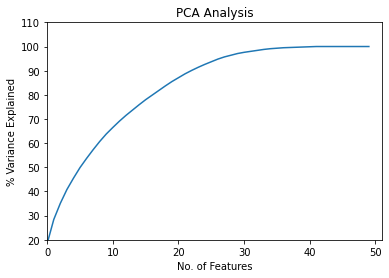

In [46]:
from sklearn.preprocessing import scale
X = scale(X)
covar_matrix = PCA(n_components=50)
covar_matrix.fit(X)

variance=covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_,decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('No. of Features')
plt.title('PCA Analysis')
plt.ylim(20,110)
plt.xlim(0,51)
plt.plot(var)


By looking at the plot above, the number of features around 25 accounts for 95% variance in the dataset.

In [47]:
# Applying PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

pca = PCA(n_components = 25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

I will compare two different linear models.

In [48]:
model_name(LinearRegression())

explained_variance     :  0.3583
r2   :  0.3477
MAE  :  19.5552
MSE  :  850.9786
RMSE :  29.1715


In [49]:
model_name(Lasso())

explained_variance     :  0.3318
r2   :  0.3253
MAE  :  20.4561
MSE  :  880.2449
RMSE :  29.6689


MSE is high which may be because we have a very small dataset.

#Conclusion

1. In ths dataset, we have information about 205 cars in the US to build a prediction model. Based on my research, I have imputed missing values manually.

2. Before thrusting the dataset into a model, I created dummy variables and removed multicollinearity in the dataset and compared different models with PCA and without PCA.

3. RandomForest model looks like the best model so far to predict the target. I can further fine tune the model to get better accuracy.